✅ Datos cargados y procesados con éxito.


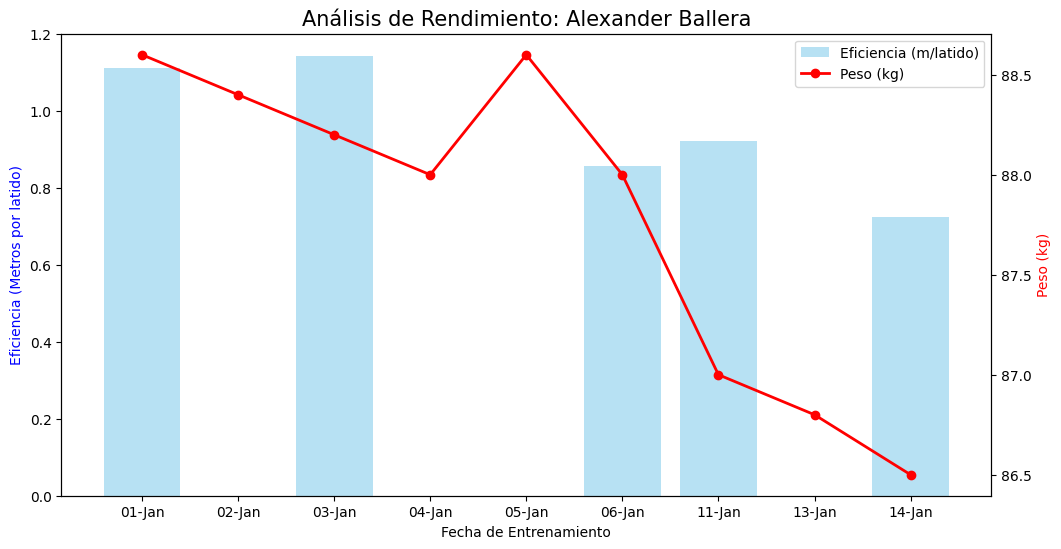

--- ANÁLISIS DEL ÚLTIMO ENTRENAMIENTO (2026-01-14) ---
Kilómetros: 3.5 km
Eficiencia: 0.724 m/latido
Peso actual: 86.5 kg (Has bajado 2.1 kg desde el inicio)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Función de Eficiencia (Metros por latido)
def calculate_efficiency(dist_km, avg_hr, duration_min):
    total_beats = avg_hr * duration_min
    return round((dist_km * 1000) / total_beats, 3)

# 2. Carga de datos
# Asegúrate de que el CSV tenga estas columnas: 
# date,distance_km,duration_min,avg_hr,cadence,weight_kg,rpe
df = pd.read_csv('../data/raw/training_log.csv') # Ajusta la ruta si es necesario
try:
    df['date'] = pd.to_datetime(df['date'])
    
    # Calcular eficiencia para cada sesión
    df['efficiency'] = df.apply(lambda x: calculate_efficiency(x['distance_km'], x['avg_hr'], x['duration_min']), axis=1)
    
    print("✅ Datos cargados y procesados con éxito.")
except:
    print("⚠️ Error: Asegúrate de que el archivo data/training_log.csv existe.")

# 3. Visualización de Progreso: Eficiencia vs Peso
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje 1: Eficiencia (Barras)
ax1.bar(df['date'].dt.strftime('%d-%b'), df['efficiency'], color='skyblue', alpha=0.6, label='Eficiencia (m/latido)')
ax1.set_ylabel('Eficiencia (Metros por latido)', color='blue')
ax1.set_xlabel('Fecha de Entrenamiento')

# Eje 2: Peso (Línea)
ax2 = ax1.twinx()
ax2.plot(df['date'].dt.strftime('%d-%b'), df['weight_kg'], color='red', marker='o', linewidth=2, label='Peso (kg)')
ax2.set_ylabel('Peso (kg)', color='red')

plt.title('Análisis de Rendimiento: Alexander Ballera', fontsize=15)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

# 4. Reporte de hoy
today = df.iloc[-1]
print(f"--- ANÁLISIS DEL ÚLTIMO ENTRENAMIENTO ({today['date'].date()}) ---")
print(f"Kilómetros: {today['distance_km']} km")
print(f"Eficiencia: {today['efficiency']} m/latido")
print(f"Peso actual: {today['weight_kg']} kg (Has bajado {round(df.iloc[0]['weight_kg'] - today['weight_kg'], 2)} kg desde el inicio)")